In [246]:
# load libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [247]:
from google.colab import files
uploaded=files.upload()


Saving spam_data.tsv to spam_data (2).tsv


In [248]:
def load_dataset():
  df=pd.read_table('spam_data.tsv', sep='\t',header=None)
  # df.head()
  return df

###Clean Dataset

In [249]:
def clean():

  df=load_dataset()
  
  #rename columns

  df=df.rename({0: 'spam', 1: 'text'}, axis='columns')

  #removing duplicates

  df.drop_duplicates(inplace=True)
  df.isnull().sum() #no nulls found
  return df

  


##Exploratory Data Analysis


In [250]:
df=clean()
df.describe()

,spam,text
count,5165,5165
unique,2,5165
top,ham,Hmm...my uncle just informed me that he's payi...
freq,4513,1


In [251]:
df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
ham   4513   4513  I.ll give her once i have it. Plus she said gr...    1
spam   652    652  18 days to Euro2004 kickoff! U will be kept in...    1

##Data Visualization

In [252]:
df['length'] = df['text'].apply(len)
df.head()

,spam,text,length
0,ham,I've been searching for the right words to tha...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35


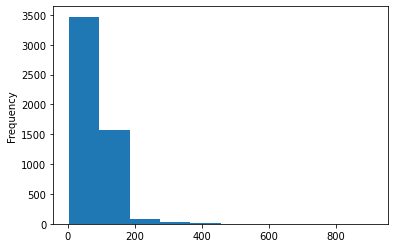

In [253]:
df['length'].plot(bins=10, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1788a52b50>,
      dtype=object)

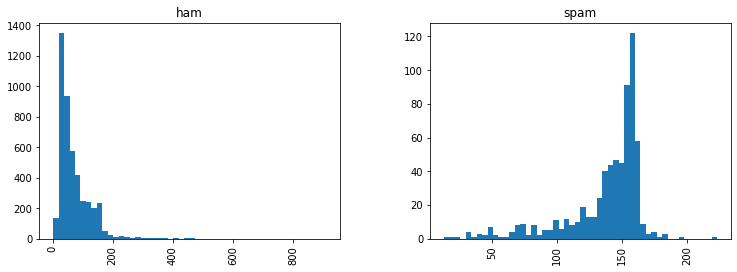

In [254]:
df.hist(column='length', by='spam', bins=50,figsize=(12,4))

### Text Preprocessing

In [255]:
def process_text(text):

  # remove punctuations


  nopunc=[char for char in text if char not in string.punctuation]
  nopunc=''.join(nopunc)

  #converting into lower case

  nopunc=nopunc.lower()
  
  # remove stopwords

  clean_words=[word for word in nopunc.split(' ') if nopunc not in stopwords.words('english')]


  #return a list of clean text words

  return clean_words

In [256]:
df=clean()

#converting dataset into bag of words

bow=CountVectorizer(analyzer=process_text).fit_transform(df['text'])

In [257]:
#spliting dataset into test and train set

X_train,X_test,y_train,y_test=train_test_split(bow,df['spam'],test_size=0.20,random_state=0)

###Encoding labels

In [258]:
# converting labels from string to 1's and 0's

def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [259]:
y_train,y_test=prepare_targets(y_train, y_test)

### NaiveBayes Classifier

In [260]:
#training train dataset

classifier=MultinomialNB().fit(X_train,y_train)

In [261]:
#Comparing predicted results and labels
print(classifier.predict(X_train))
print(y_train)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [262]:
#measuring performance of model on train dataset

pred=classifier.predict(X_train)
print(classification_report(y_train,pred))
print('\n')
print('Confusion Matrix:\n',confusion_matrix(y_train,pred))
print('\n')
print("Accuracy",accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3609
           1       0.97      0.95      0.96       523

    accuracy                           0.99      4132
   macro avg       0.98      0.97      0.98      4132
weighted avg       0.99      0.99      0.99      4132



Confusion Matrix:
 [[3594   15]
 [  24  499]]


Accuracy 0.9905614714424008


In [263]:
#measuring the prformance on test set

pred=classifier.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print()
nb_acc=accuracy_score(y_test,pred)
print("Accuracy",accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       904
           1       0.87      0.91      0.89       129

    accuracy                           0.97      1033
   macro avg       0.93      0.95      0.94      1033
weighted avg       0.97      0.97      0.97      1033


Confusion Matrix:
 [[887  17]
 [ 11 118]]

Accuracy 0.972894482090997


###Decision Tree

In [264]:
#training train dataset

classifier2=DecisionTreeClassifier().fit(X_train,y_train)

In [265]:
#measuring performance of model on train dataset

pred=classifier2.predict(X_train)
print(classification_report(y_train,pred))
print('\n')
print('Confusion Matrix:\n',confusion_matrix(y_train,pred))
print('\n')
print("Accuracy",accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3609
           1       1.00      1.00      1.00       523

    accuracy                           1.00      4132
   macro avg       1.00      1.00      1.00      4132
weighted avg       1.00      1.00      1.00      4132



Confusion Matrix:
 [[3609    0]
 [   0  523]]


Accuracy 1.0


In [266]:
#Predicting results on test dataset

print(classifier2.predict(X_test))
print(y_test)

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


In [267]:

#measuring the prformance on test set

pred=classifier2.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print()
dt_acc=accuracy_score(y_test,pred)
print(dt_acc)
print("Accuracy",accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       904
           1       0.90      0.84      0.87       129

    accuracy                           0.97      1033
   macro avg       0.94      0.91      0.92      1033
weighted avg       0.97      0.97      0.97      1033


Confusion Matrix:
 [[892  12]
 [ 21 108]]

0.968054211035818
Accuracy 0.968054211035818


###KNN classifier

In [268]:
#training train dataset

classifier3=KNeighborsClassifier().fit(X_train,y_train)

In [269]:
print(classifier3.predict(X_train))
print(y_train)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [270]:
#measuring performance of model on train dataset

pred=classifier3.predict(X_train)
print(classification_report(y_train,pred))
print('\n')
print('Confusion Matrix:\n',confusion_matrix(y_train,pred))
print('\n')
print("Accuracy",accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3609
           1       1.00      0.43      0.60       523

    accuracy                           0.93      4132
   macro avg       0.96      0.71      0.78      4132
weighted avg       0.93      0.93      0.91      4132



Confusion Matrix:
 [[3609    0]
 [ 300  223]]


Accuracy 0.9273959341723137


In [271]:
#measuring the prformance on test set

pred=classifier3.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print()
knn_acc=accuracy_score(y_test,pred)
print("Accuracy",accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       904
           1       1.00      0.30      0.46       129

    accuracy                           0.91      1033
   macro avg       0.95      0.65      0.71      1033
weighted avg       0.92      0.91      0.89      1033


Confusion Matrix:
 [[904   0]
 [ 90  39]]

Accuracy 0.9128751210067764


In [272]:
#Predicting results on test dataset

print(classifier3.predict(X_test))
print(y_test)

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


###Display results of three different models

In [273]:
models=[nb_acc,knn_acc,dt_acc]
results=['Naive-B','KNN','Dtree']

rdf=pd.DataFrame(results)
rdf[1]=models

In [274]:
rdf

,0,1
0,Naive-B,0.972894
1,KNN,0.912875
2,Dtree,0.968054
